In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
train_file = r'./data/train.csv'
train_df = pd.read_csv(train_file)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
test_file = f'./data/test.csv'
test_df = pd.read_csv(test_file)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 1. Age - 평균값 활용

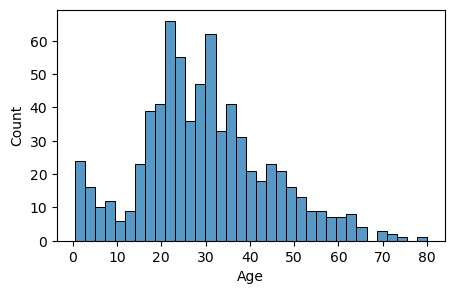

In [134]:
# 1. Age
plt.figure(figsize=(5,3))

sns.histplot(train_df, x='Age', bins=35)

plt.show()
# => 평균으로 결측치를 채움

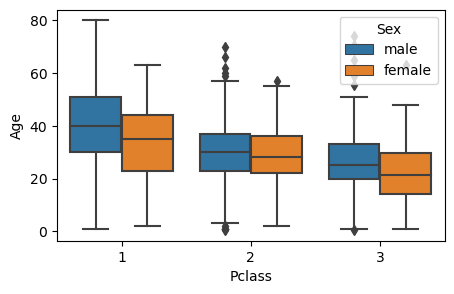

In [135]:
# Age와 Sex의 상관관계 확인 - boxplot()
plt.figure(figsize=(5,3))

sns.boxplot(train_df, x='Pclass', y='Age', hue='Sex')

plt.show()

In [136]:
temp = train_df.groupby(by=['Pclass', 'Sex'])['Age'].mean()
temp

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [137]:
temp[1]['female']

34.61176470588235

In [138]:
# Age 결측치 채우기
for val in temp.index:
    cond1 = train_df['Age'].isna()
    cond2 = train_df['Pclass'] == val[0]
    cond3 = train_df['Sex'] == val[1]
    train_df.loc[ cond1 & cond2 & cond3, 'Age'] = temp[ val ]

    cond1 = test_df['Age'].isna()
    cond2 = test_df['Pclass'] == val[0]
    cond3 = test_df['Sex'] == val[1]
    test_df.loc[ cond1 & cond2 & cond3, 'Age'] = temp[ val ]


In [139]:
train_df.isna().sum()
# test_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Fare - 중간값 활용

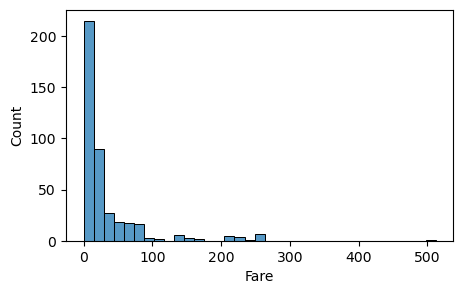

In [140]:
# 중간값 사용
plt.figure(figsize=(5,3))

sns.histplot(test_df, x='Fare', bins=35)

plt.show()

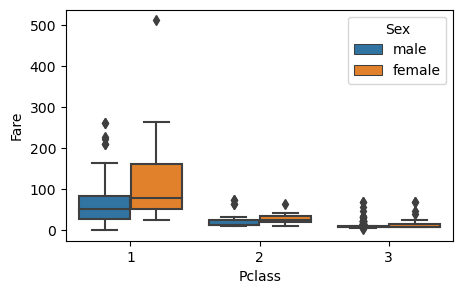

In [141]:
plt.figure(figsize=(5,3))

sns.boxplot(test_df, x='Pclass', y='Fare', hue='Sex')

plt.show()

In [142]:
temp2 = test_df.groupby(by=['Pclass', 'Sex'])['Fare'].median()
temp2

Pclass  Sex   
1       female    79.02500
        male      51.86250
2       female    26.00000
        male      13.00000
3       female     8.08125
        male       7.89580
Name: Fare, dtype: float64

In [143]:
for val in temp2.index:
    cond1 = test_df['Fare'].isna()
    cond2 = test_df['Pclass'] == val[0]
    cond3 = test_df['Sex'] == val[1]
    test_df.loc[cond1&cond2&cond3, 'Fare'] = temp[val]

In [144]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### 3. Embarked - 최빈값 활용

In [145]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


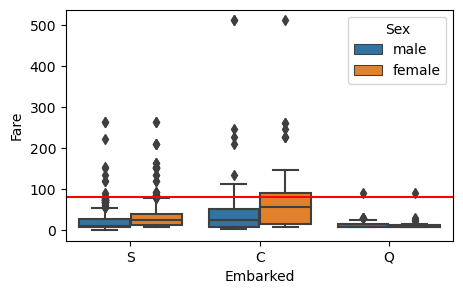

In [146]:
plt.figure(figsize=(5,3))

sns.boxplot(train_df, x='Embarked', y='Fare', hue='Sex')
# plt.ylim([0, 120])
plt.axhline( 80, color='red' )

plt.show()

In [147]:
train_df.loc[[61,829], 'Embarked'] = 'C'

In [148]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [149]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 스케일링

In [150]:
# 스케일링
import numpy as np

train_df['Fare_log'] = np.log1p( train_df['Fare'] )

In [151]:
from sklearn.preprocessing import StandardScaler

standard_sc = StandardScaler()
standard_sc.fit( train_df[['Age', 'Fare_log']] )
train_df[ ['Age_s', 'Fare_s'] ] = standard_sc.transform( train_df[['Age', 'Fare_log']] )

In [152]:
# test
test_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df[['Age_s', 'Fare_s']] = standard_sc.transform(test_df[['Age', 'Fare_log']])

In [153]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_log', 'Age_s',
       'Fare_s'],
      dtype='object')

In [154]:
select_col = ['Survived', 'PassengerId', 'Pclass', 'Sex', 'Age_s', 'Fare_s', 'Embarked']
select_col2 = ['PassengerId', 'Pclass', 'Sex', 'Age_s', 'Fare_s', 'Embarked']

train_df_1 = train_df[select_col]
test_df_1 = test_df[select_col2]

### 원핫인코딩

In [155]:
# 원핫인코딩
cate_col = ['Pclass', 'Sex', 'Embarked']


train_final = pd.get_dummies(train_df_1, dtype='int', columns=cate_col, drop_first=True)
test_final = pd.get_dummies(test_df_1, dtype='int', columns=cate_col, drop_first=True)

In [156]:
train_final.head()

,Survived,PassengerId,Age_s,Fare_s,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,-0.551366,-0.879741,0,1,1,0,1
1,1,2,0.654030,1.361220,0,0,0,0,0
2,1,3,-0.250017,-0.798540,0,1,0,0,1
3,1,4,0.428018,1.062038,0,0,0,0,1
4,0,5,0.428018,-0.784179,0,1,1,0,1


In [157]:
test_final.head()

,PassengerId,Age_s,Fare_s,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,0.390349,-0.879741,0,1,1,1,0
1,893,1.332065,1.361220,0,1,0,0,1
2,894,2.462123,-0.798540,1,0,1,1,0
3,895,-0.174680,1.062038,0,1,1,0,1
4,896,-0.551366,-0.784179,0,1,0,0,1


### 머신러닝

In [158]:
train_final
test_final

,PassengerId,Age_s,Fare_s,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,0.390349,-0.879741,0,1,1,1,0
1,893,1.332065,1.361220,0,1,0,0,1
2,894,2.462123,-0.798540,1,0,1,1,0
3,895,-0.174680,1.062038,0,1,1,0,1
4,896,-0.551366,-0.784179,0,1,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,-0.211777,-3.058578,0,1,1,0,1
414,1306,0.729367,-0.798540,0,0,0,0,0
415,1307,0.691698,-0.784179,0,1,1,0,1
416,1308,-0.211777,0.567163,0,1,1,0,1


In [159]:
train_final.columns

features_name = ['Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3',
                  'Sex_male', 'Embarked_Q', 'Embarked_S']

In [160]:
X = train_final[features_name]
y = train_final['Survived']

In [161]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.2)

In [164]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

knn_result = pd.DataFrame( test_final['PassengerId'] )
knn_result['Survived'] = knn.predict(test_final[features_name])

knn_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf.score(valid_x, valid_y)

rf.predict(test_final[features_name])

rf_result = pd.DataFrame( test_final['PassengerId'] )
rf_result['Survived'] = rf.predict( test_final[features_name] )

In [167]:
rf_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0
